In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
plt.rcParams["figure.figsize"] = (20,10)

In [54]:
df = pd.read_csv('stud_math.csv')

In [42]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Посмотрите на распределение признака для числовых переменных, устраните выбросы.

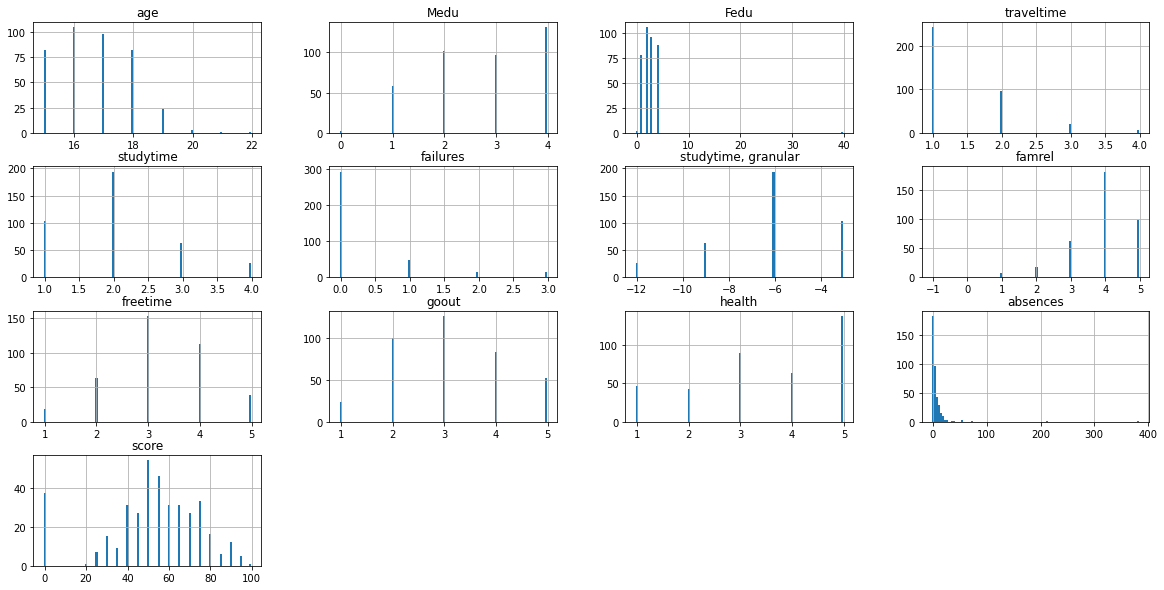

In [44]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=100, align='left');

In [45]:
df['Fedu'].describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [46]:
df = df[df['Fedu'] <= 4]
# Решила отфильтровать колонку Fedu , так как допустимый значения от 1 до 4, кто то по ошибке вписал цифру 40

In [24]:
df['famrel'].describe()

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [48]:
df = df[df['famrel'] >= 1]
# Решила отфильтровать колонку famrel,  так как допустимые значения от 1 до 5, но мы так же видели ошибочное значение -1

In [60]:
df.drop(['studytime, granular'], inplace = True, axis = 1)
# Здесь я решила убрать название granular, так как оно нигде не фигурирует

In [50]:
df['absences'] = np.log(df['absences'] + 1)
# В колонке absences , как мне показалось , очень длинный правый «хвост», я решила его сделать более понятным

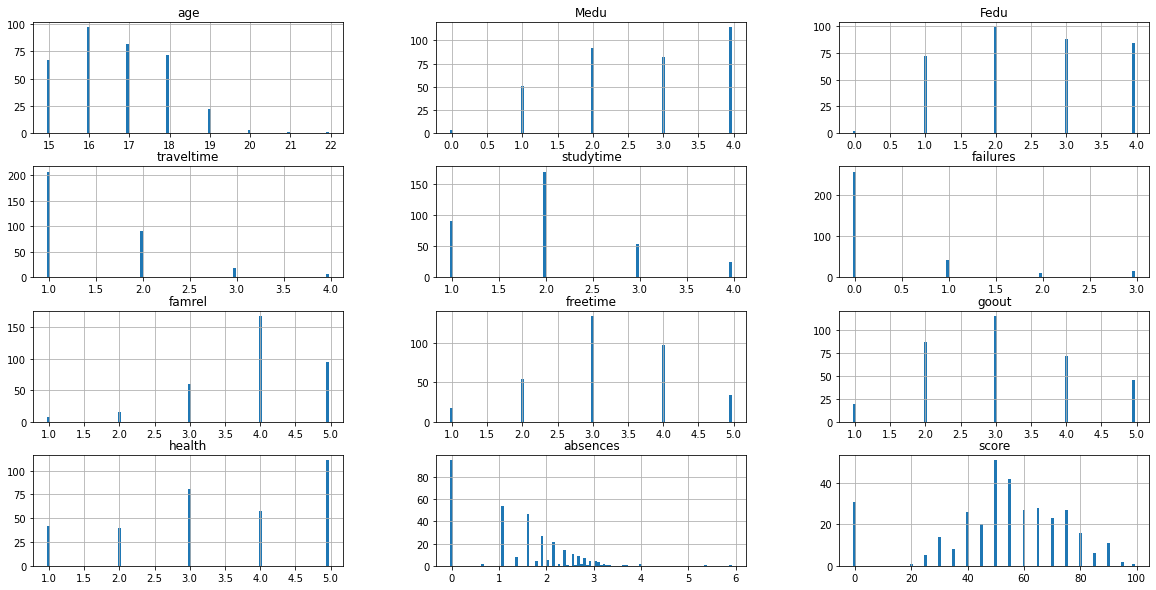

In [51]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=100, align='left');

# Оцените количество уникальных значений для номинативных переменных.

In [17]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print()

GP    349
MS     46
Name: school, dtype: int64

F    208
M    187
Name: sex, dtype: int64

U    295
R     83
Name: address, dtype: int64

GT3    261
LE3    107
Name: famsize, dtype: int64

T    314
A     36
Name: Pstatus, dtype: int64

GP    326
MS     44
Name: Fedu, dtype: int64

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

mother    250
father     86
other      28
Name: guardian, dtype: int64

no     335
yes     51
Name: schoolsup, dtype: int64

yes    219
no     137
Name: famsup, dtype: int64

no     200
yes    155
Name: paid, dtype: int64

yes    195
no     186
Name: activities, dtype: int64

yes    300
no      79
Name: nursery, dtype: int64

yes    356
no      19
Name: higher, dtype: int64

yes    305
no      56
Name: 

# Проведите корреляционный анализ количественных переменных

In [52]:
df.select_dtypes(include=['float64', 'int64']).corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.155335,-0.168980,0.066752,-0.033474,0.255513,0.063349,0.021524,0.107076,-0.062275,0.151961,-0.148832
Medu,-0.155335,1.000000,0.642674,-0.166971,0.092661,-0.237919,-0.024829,0.007366,0.072158,-0.073154,0.092761,0.205382
Fedu,-0.168980,0.642674,1.000000,-0.189226,0.012119,-0.264906,-0.035788,-0.027291,0.024714,0.010998,0.027119,0.132420
traveltime,0.066752,-0.166971,-0.189226,1.000000,-0.115118,0.061574,-0.045855,-0.000118,0.015826,-0.034275,-0.039442,-0.062583
studytime,-0.033474,0.092661,0.012119,-0.115118,1.000000,-0.150694,0.029336,-0.126143,-0.064398,-0.086337,-0.041627,0.120601
failures,0.255513,-0.237919,-0.264906,0.061574,-0.150694,1.000000,0.009199,0.113254,0.123837,0.067665,0.064460,-0.331450
famrel,0.063349,-0.024829,-0.035788,-0.045855,0.029336,0.009199,1.000000,0.167233,0.075583,0.101361,-0.088390,0.040078
freetime,0.021524,0.007366,-0.027291,-0.000118,-0.126143,0.113254,0.167233,1.000000,0.283055,0.104436,0.022340,0.021726
goout,0.107076,0.072158,0.024714,0.015826,-0.064398,0.123837,0.075583,0.283055,1.000000,-0.023786,0.078895,-0.137584
health,-0.062275,-0.073154,0.010998,-0.034275,-0.086337,0.067665,0.101361,0.104436,-0.023786,1.000000,-0.068049,-0.059363


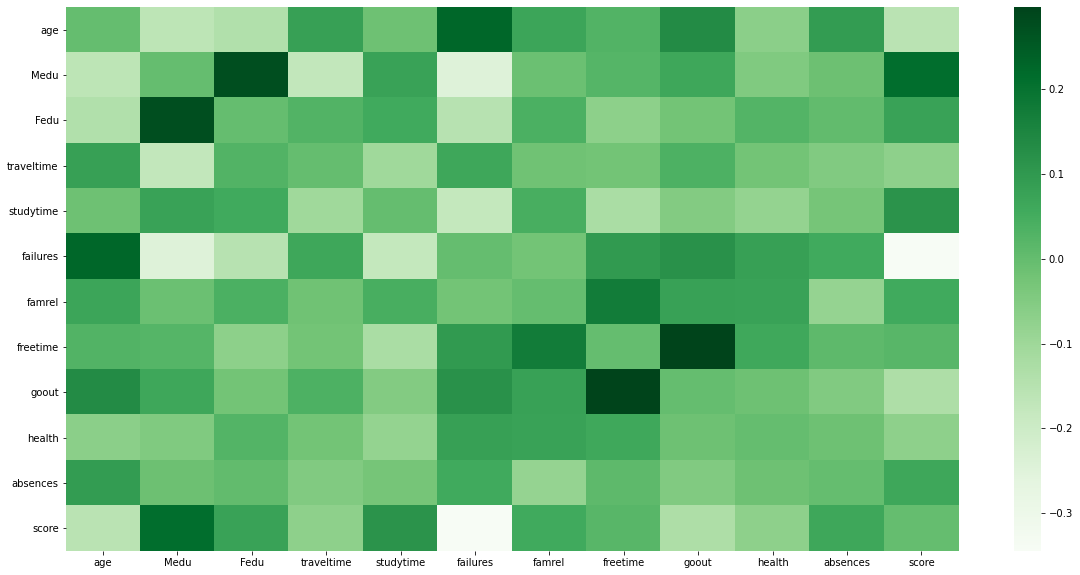

In [61]:
x = df.corr().replace(1.0,0)
sns.heatmap(x, cmap="Greens");

# Отберите не коррелирующие переменные.

In [62]:
# пары сильно коррелирующих колонок 'Fedu Medu' и 'goout freetime' 
#  удалим по одной из них    
df.drop(['Fedu', 'goout'], inplace = True, axis = 1)

# Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

In [63]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

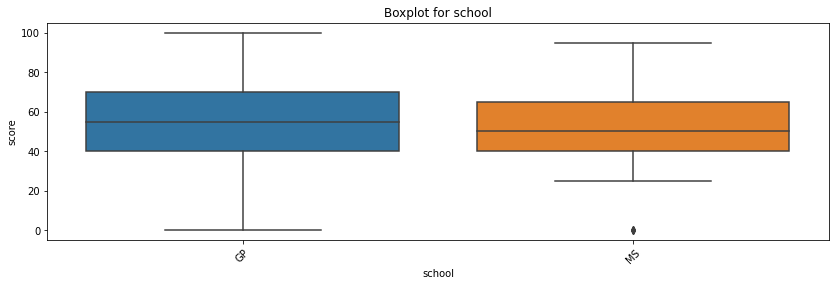

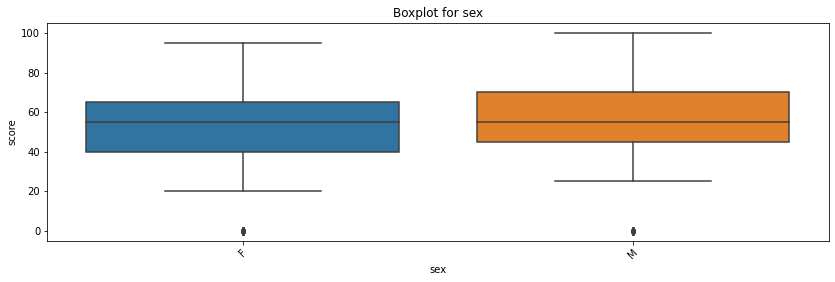

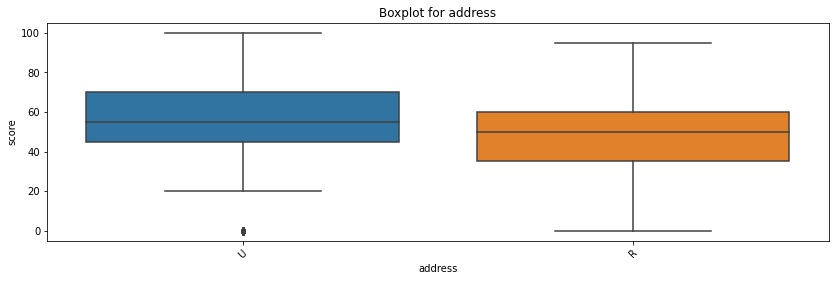

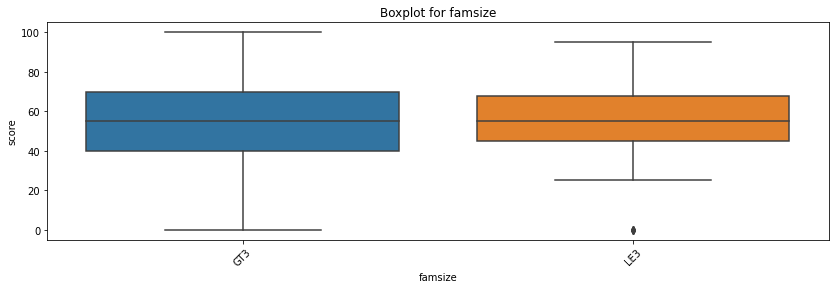

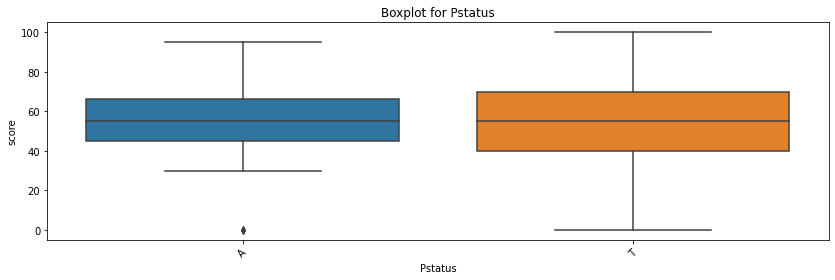

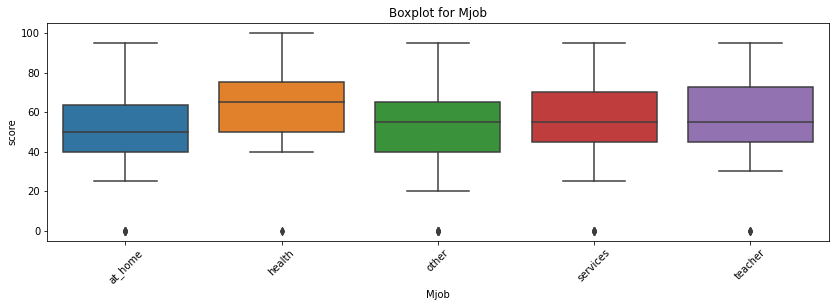

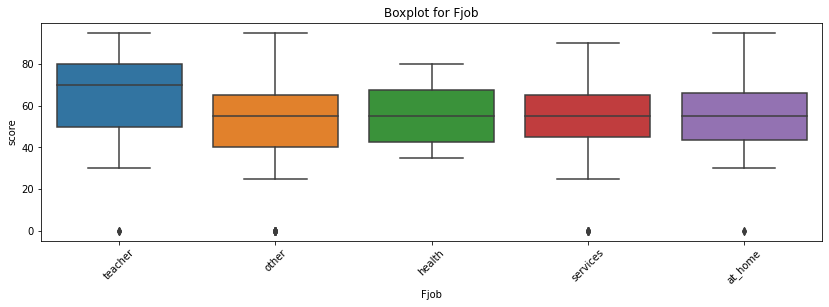

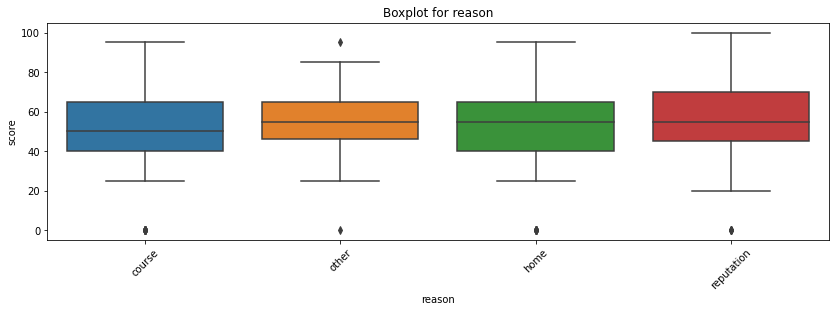

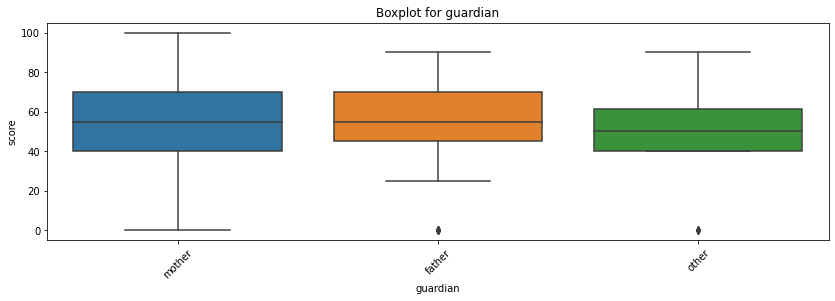

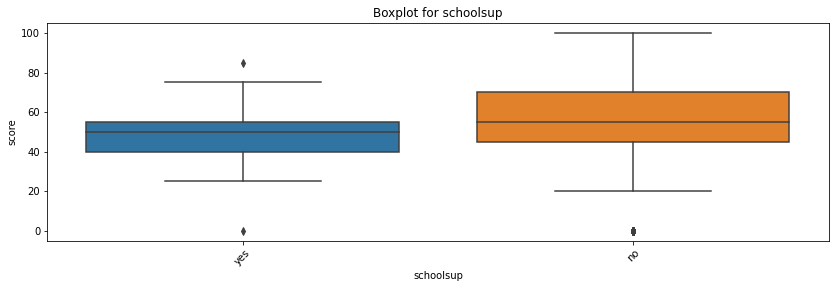

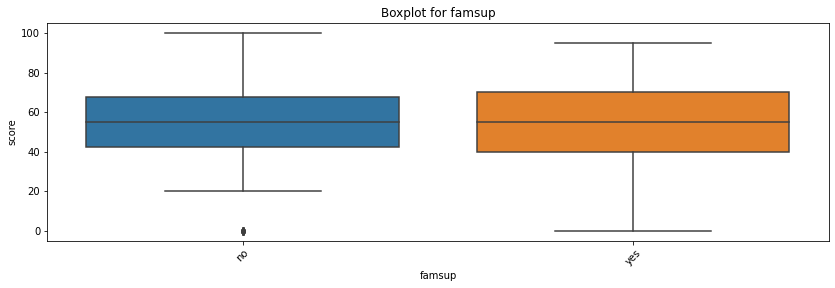

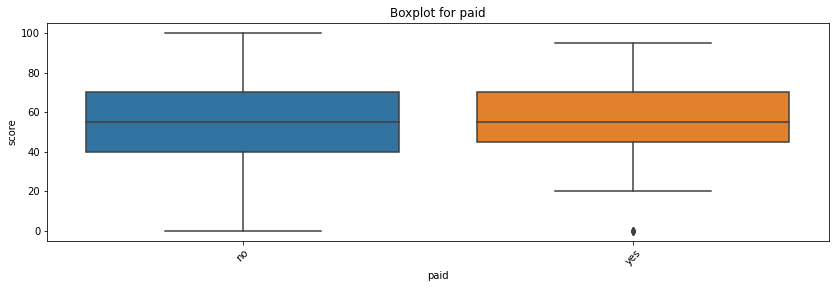

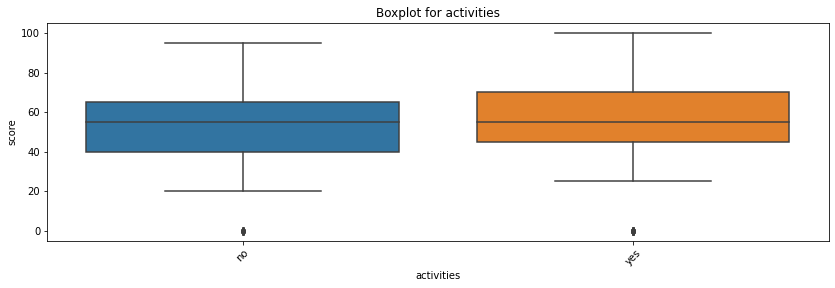

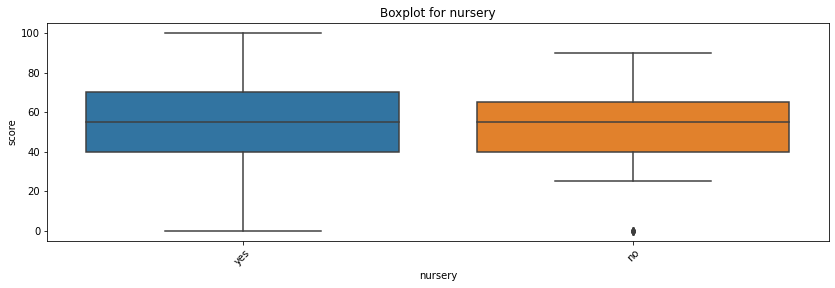

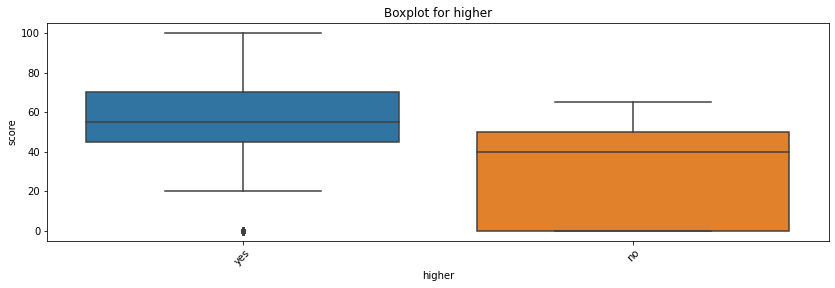

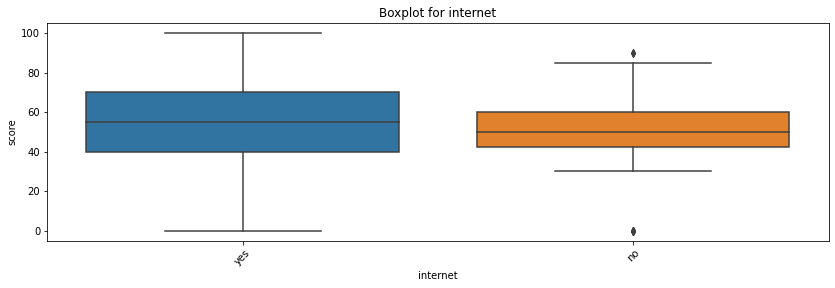

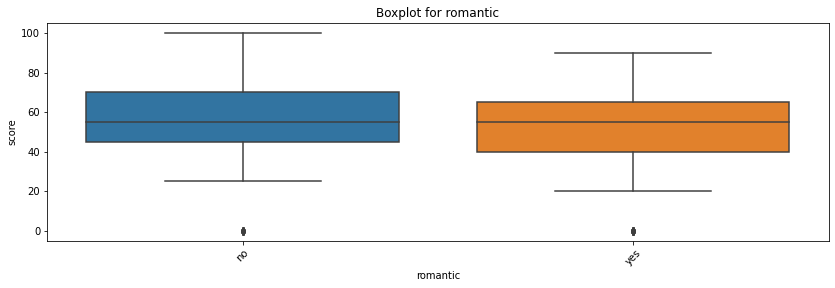

In [64]:
for column in df.select_dtypes(include='object').columns:
    get_boxplot(column)    

In [65]:
# как мне кажется такте категории как famsize, Pstatus, famsup, nursery не влияют на колличество баллов
# поэтому мы их удалим
df.drop(['famsize', 'Pstatus', 'famsup', 'nursery'], inplace = True, axis = 1)

In [66]:
# Очень интересно было пронаблюдать некоторые критерии, влияние на оценку ученика. Но более всего показалось интересным что на оценку влияет очень сильно профессия родителей: в случае мамы -доктор, в случае отца-учитель.